In [86]:
import pandas as pd
import numpy as np


housing =pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [87]:
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no':0})
housing['guestroom'] = housing.guestroom.map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [88]:
st =pd.get_dummies(housing['furnishingstatus'],drop_first= True )

In [89]:
housing = pd.concat([housing,st],axis= 1 )
housing = housing.drop(['furnishingstatus'],axis= 1)

In [90]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [91]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
housing = housing.apply(normalize)

In [92]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom']]
y = housing['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [93]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           6.46e-83
Time:                        20:36:13   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [95]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [96]:
# Calculating Vif value|
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

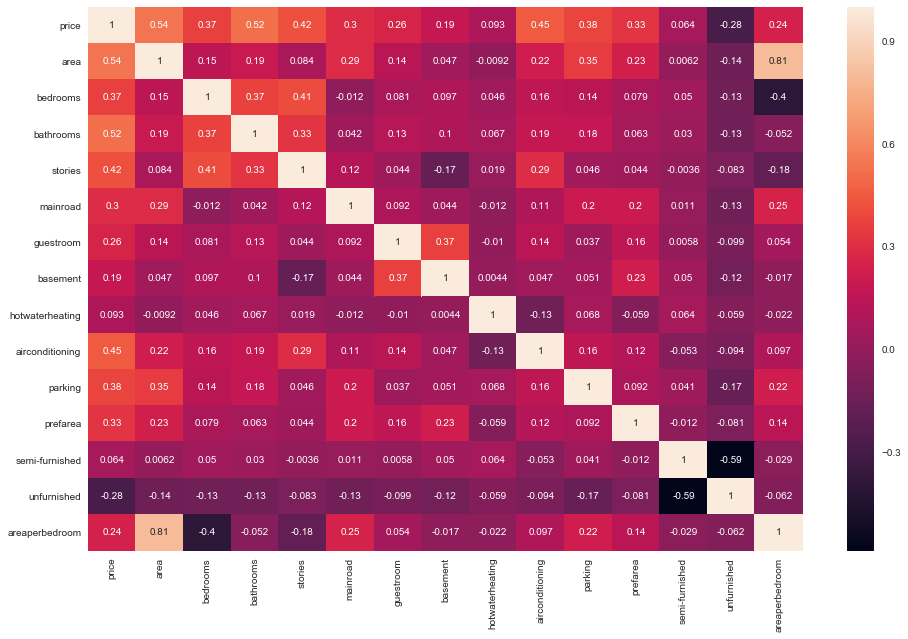

In [98]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True);

In [99]:
# Dropping highly correlated variables and insignificant variables
X_train  = X_train.drop('areaperbedroom', 1)
lm_2     = sm.OLS(y_train,X_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           8.83e-83
Time:                        20:36:17   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0162      0.021     

In [100]:
vif_cal(input_data=housing.drop(["areaperbedroom"], axis=1), dependent_col="price")

,Var,Vif
1,bedrooms,7.55
4,mainroad,5.91
0,area,4.64
3,stories,2.75
11,semi-furnished,2.24
6,basement,2.01
9,parking,2.00
12,unfurnished,1.87
8,airconditioning,1.76
2,bathrooms,1.69


In [101]:
# Dropping highly correlated variables and insignificant variables
X_train  = X_train.drop('bedrooms', 1)
lm_3     = sm.OLS(y_train,X_train).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           2.35e-83
Time:                        20:36:17   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [102]:
vif_cal(input_data=housing.drop(["bedrooms","areaperbedroom"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [103]:
# # Dropping highly correlated variables and insignificant variables
X_train   = X_train.drop('semi-furnished', 1)
lm_4      = sm.OLS(y_train,X_train).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           2.73e-84
Time:                        20:36:19   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [104]:
vif_cal(input_data=housing.drop(["bedrooms","areaperbedroom","semi-furnished"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [105]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('basement', 1)
lm_5    = sm.OLS(y_train,X_train).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           3.13e-84
Time:                        20:36:20   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [106]:
vif_cal(input_data=housing.drop(["bedrooms","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


In [107]:
# Adding  constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)
X_test_m5 = X_test_m5.drop(["bedrooms","areaperbedroom","semi-furnished","basement"], axis=1)
y_pred_m5 = lm_5.predict(X_test_m5)

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


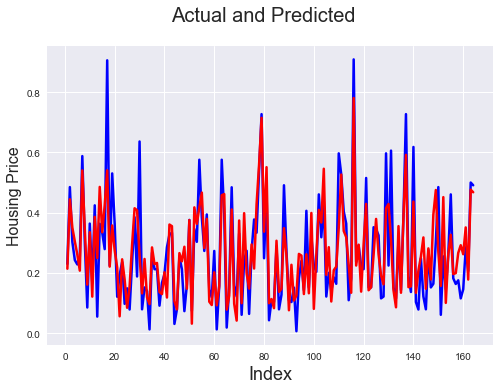

In [109]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m5, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16);                       # Y-label

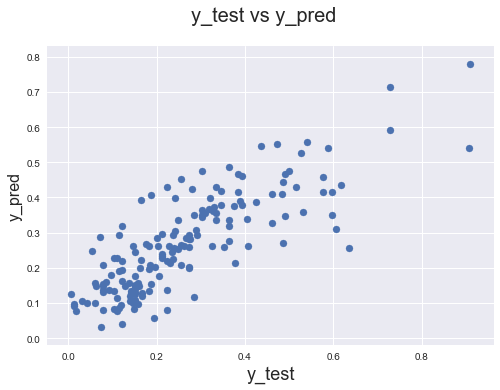

In [110]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16);                          # Y-label

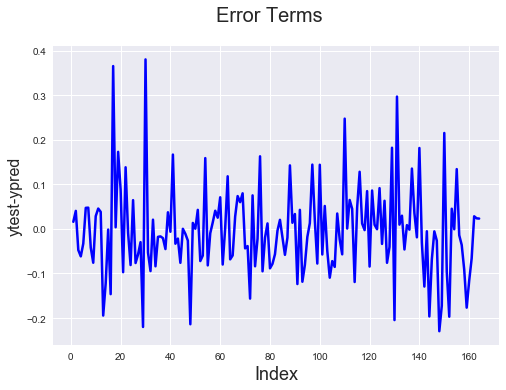

In [111]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m5, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16);                # Y-label

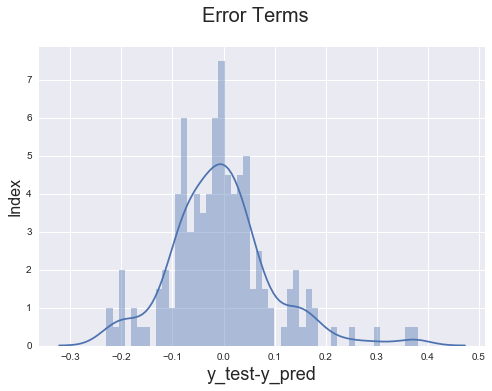

In [112]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m5),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16);                          # Y-label

In [114]:

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m5)))

RMSE : 0.10001092336807833
